# **Hotel** **Reviews** **Project**

---



---

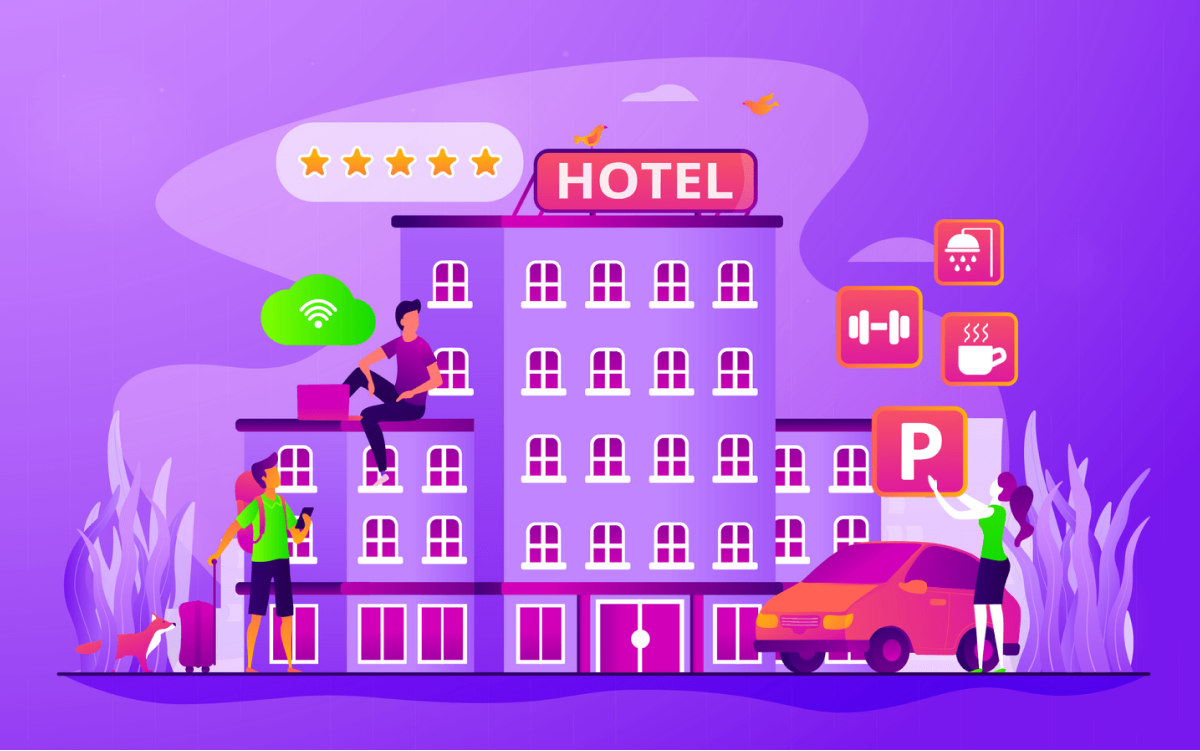

In [ ]:
# Installing PySpark
!pip install pyspark

In [ ]:
# Importing Necessary Libraries
import pyspark
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.mllib.feature import StandardScaler,PCA
from pyspark.mllib.stat import Statistics
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
spark = SparkSession.builder.appName("DataFrame Preprocessing").getOrCreate()

In [ ]:
spark = SparkSession.builder.config("spark.executor.memory", "4g").appName("DataFrame Preprocessing").getOrCreate()

In [ ]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("YourAppName").getOrCreate()

# Now you can read the CSV file
df = spark.read.format("csv").option("header", True).load("/content/hotel_reviews_enriched.csv")

In [ ]:
#df.limit(10).toPandas()

In [ ]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- Hotel_Name: string (nullable = true)
 |-- Hotel_Address: string (nullable = true)
 |-- Hotel_Country: string (nullable = true)
 |-- Hotel_State: string (nullable = true)
 |-- Hotel_City: string (nullable = true)
 |-- Hotel_lat: string (nullable = true)
 |-- Hotel_lng: string (nullable = true)
 |-- Businesses_100m: string (nullable = true)
 |-- Businesses_1km: string (nullable = true)
 |-- Businesses_5km: string (nullable = true)
 |-- Room_Type: string (nullable = true)
 |-- Room_Type_Level: string (nullable = true)
 |-- Bed_Type: string (nullable = true)
 |-- Tags: string (nullable = true)
 |-- Guest_Type: string (nullable = true)
 |-- Trip_Type: string (nullable = true)
 |-- Stay_Duration: string (nullable = true)
 |-- Review_Date: string (nullable = true)
 |-- Day_of_Week: string (nullable = true)
 |-- Day_of_Year: string (nullable = true)
 |-- Days_Since_Review: string (nullable = true)
 |-- Week_of_Month: string (nullable = true)
 |-- Wee

## **Data** **Description**

In [ ]:
# display columns
df.columns

['id',
 'Hotel_Name',
 'Hotel_Address',
 'Hotel_Country',
 'Hotel_State',
 'Hotel_City',
 'Hotel_lat',
 'Hotel_lng',
 'Businesses_100m',
 'Businesses_1km',
 'Businesses_5km',
 'Room_Type',
 'Room_Type_Level',
 'Bed_Type',
 'Tags',
 'Guest_Type',
 'Trip_Type',
 'Stay_Duration',
 'Review_Date',
 'Day_of_Week',
 'Day_of_Year',
 'Days_Since_Review',
 'Week_of_Month',
 'Week_of_Year',
 'Is_Hotel_Holiday',
 'Is_Reviewer_Holiday',
 'Quarter_of_Year',
 'Total_Number_of_Reviews',
 'Review_Is_Positive',
 'Review_Positivity_Rate',
 'Reviewer_Nationality',
 'Reviewer_Country',
 'Negative_Review',
 'Review_Total_Negative_Word_Counts',
 'Positive_Review',
 'Review_Total_Positive_Word_Counts',
 'Average_Score',
 'Reviewer_Score',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Additional_Number_of_Scoring',
 'Submitted_from_Mobile']

In [ ]:
#Get the size of our dataframe
df.count()

65188

In [ ]:
# check the dataset types
df.dtypes

[('id', 'string'),
 ('Hotel_Name', 'string'),
 ('Hotel_Address', 'string'),
 ('Hotel_Country', 'string'),
 ('Hotel_State', 'string'),
 ('Hotel_City', 'string'),
 ('Hotel_lat', 'string'),
 ('Hotel_lng', 'string'),
 ('Businesses_100m', 'string'),
 ('Businesses_1km', 'string'),
 ('Businesses_5km', 'string'),
 ('Room_Type', 'string'),
 ('Room_Type_Level', 'string'),
 ('Bed_Type', 'string'),
 ('Tags', 'string'),
 ('Guest_Type', 'string'),
 ('Trip_Type', 'string'),
 ('Stay_Duration', 'string'),
 ('Review_Date', 'string'),
 ('Day_of_Week', 'string'),
 ('Day_of_Year', 'string'),
 ('Days_Since_Review', 'string'),
 ('Week_of_Month', 'string'),
 ('Week_of_Year', 'string'),
 ('Is_Hotel_Holiday', 'string'),
 ('Is_Reviewer_Holiday', 'string'),
 ('Quarter_of_Year', 'string'),
 ('Total_Number_of_Reviews', 'string'),
 ('Review_Is_Positive', 'string'),
 ('Review_Positivity_Rate', 'string'),
 ('Reviewer_Nationality', 'string'),
 ('Reviewer_Country', 'string'),
 ('Negative_Review', 'string'),
 ('Review_To

In [ ]:
#display the shape
def get_shape(df):
    num_rows = df.count()
    num_columns = len(df.columns)
    return num_rows, num_columns
shape = get_shape(df)
print("Shape of df: {}".format(shape))

Shape of df: (65188, 41)


In [ ]:
# get a summary statistics
#df.toPandas().describe()

## **Data** **Preprocessing**

In [ ]:
# Drop non-necessary columns
columns_to_drop = ["Businesses_100m","Businesses_1km","Businesses_5km","Room_Type_Level","Bed_Type","Day_of_Week","Day_of_Year","Days_Since_Review","Week_of_Year","Week_of_Month","Reviewer_Country","Submitted_from_Mobile","Positive_Review","Negative_Review","Tags"]
df = df.drop(*columns_to_drop)
# display columns after dropping
df.columns

['id',
 'Hotel_Name',
 'Hotel_Address',
 'Hotel_Country',
 'Hotel_State',
 'Hotel_City',
 'Hotel_lat',
 'Hotel_lng',
 'Room_Type',
 'Guest_Type',
 'Trip_Type',
 'Stay_Duration',
 'Review_Date',
 'Is_Hotel_Holiday',
 'Is_Reviewer_Holiday',
 'Quarter_of_Year',
 'Total_Number_of_Reviews',
 'Review_Is_Positive',
 'Review_Positivity_Rate',
 'Reviewer_Nationality',
 'Review_Total_Negative_Word_Counts',
 'Review_Total_Positive_Word_Counts',
 'Average_Score',
 'Reviewer_Score',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Additional_Number_of_Scoring']

In [ ]:
#display rows that have duplicate values across all columns
df.exceptAll(df.dropDuplicates()).show()
# No duplicates

+---+----------+-------------+-------------+-----------+----------+---------+---------+---------+----------+---------+-------------+-----------+----------------+-------------------+---------------+-----------------------+------------------+----------------------+--------------------+---------------------------------+---------------------------------+-------------+--------------+------------------------------------------+----------------------------+
| id|Hotel_Name|Hotel_Address|Hotel_Country|Hotel_State|Hotel_City|Hotel_lat|Hotel_lng|Room_Type|Guest_Type|Trip_Type|Stay_Duration|Review_Date|Is_Hotel_Holiday|Is_Reviewer_Holiday|Quarter_of_Year|Total_Number_of_Reviews|Review_Is_Positive|Review_Positivity_Rate|Reviewer_Nationality|Review_Total_Negative_Word_Counts|Review_Total_Positive_Word_Counts|Average_Score|Reviewer_Score|Total_Number_of_Reviews_Reviewer_Has_Given|Additional_Number_of_Scoring|
+---+----------+-------------+-------------+-----------+----------+---------+---------+-----

In [ ]:
# Check the percentage of Nulls in dataset
import pyspark.sql.functions as F
def check_missing(dataframe):
    total_rows = dataframe.count()
    missing_counts = dataframe.select([F.count(F.when(F.isnan(F.col(c)) | F.col(c).isNull(), c)).alias(c) for c in dataframe.columns])

    for column in dataframe.columns:
        missing_count = missing_counts.select(column).collect()[0][0]
        percentage_missing = (missing_count / total_rows) * 100
        print(f"Percentage of missing values in column '{column}': {percentage_missing:.2f}%")
check_missing(df)

Percentage of missing values in column 'id': 0.00%
Percentage of missing values in column 'Hotel_Name': 0.00%
Percentage of missing values in column 'Hotel_Address': 0.00%
Percentage of missing values in column 'Hotel_Country': 0.00%
Percentage of missing values in column 'Hotel_State': 0.00%
Percentage of missing values in column 'Hotel_City': 0.00%
Percentage of missing values in column 'Hotel_lat': 0.00%
Percentage of missing values in column 'Hotel_lng': 0.00%
Percentage of missing values in column 'Room_Type': 0.00%
Percentage of missing values in column 'Guest_Type': 0.00%
Percentage of missing values in column 'Trip_Type': 0.00%
Percentage of missing values in column 'Stay_Duration': 0.00%
Percentage of missing values in column 'Review_Date': 0.00%
Percentage of missing values in column 'Is_Hotel_Holiday': 0.00%
Percentage of missing values in column 'Is_Reviewer_Holiday': 0.00%
Percentage of missing values in column 'Quarter_of_Year': 0.00%
Percentage of missing values in colum

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when
columns_to_search = df.columns

# Count the occurrences of the word "Null" for each column
null_counts = []

for column in columns_to_search:
    null_count = df.select(sum(when(col(column) == 'NULL', 1).otherwise(0)).alias(column)).collect()[0][column]
    null_counts.append((column, null_count))

# Display the counts
for column, count in null_counts:
    print(f"Number of occurrences of the word 'Null' in column '{column}': {count}")


Number of occurrences of the word 'Null' in column 'id': 0
Number of occurrences of the word 'Null' in column 'Hotel_Name': 0
Number of occurrences of the word 'Null' in column 'Hotel_Address': 0
Number of occurrences of the word 'Null' in column 'Hotel_Country': 0
Number of occurrences of the word 'Null' in column 'Hotel_State': 0
Number of occurrences of the word 'Null' in column 'Hotel_City': 0
Number of occurrences of the word 'Null' in column 'Hotel_lat': 0
Number of occurrences of the word 'Null' in column 'Hotel_lng': 0
Number of occurrences of the word 'Null' in column 'Room_Type': 16
Number of occurrences of the word 'Null' in column 'Guest_Type': 0
Number of occurrences of the word 'Null' in column 'Trip_Type': 187
Number of occurrences of the word 'Null' in column 'Stay_Duration': 21
Number of occurrences of the word 'Null' in column 'Review_Date': 0
Number of occurrences of the word 'Null' in column 'Is_Hotel_Holiday': 0
Number of occurrences of the word 'Null' in column 'I

**Insights**

> 1. The percentage of columns with nulls is very small.

       "drop nulls"


> 2. We have other columns with nulls, but they are typed as "NULL" words, so  
     we will determine them in the handling of missing values.

> 3. We have three columns have nulls such as:

    ['Hotel_State' : 3268,'Trip_Type': 1616,  'Room_Type': 270, 'Stay_Duration': 151]

> 4. the disrtibution of nulls of these columns are small

     "simple imputer" to fill nulls











In [ ]:
# Drop Nulls in "Reviewer_Nationality,Negative_Review,Positive_Review"
from pyspark.sql.functions import col
columns_to_check = ["Reviewer_Nationality"]

# Drop rows with null values in the specified columns
df = df.dropna(subset=columns_to_check)
df.show()

+---+-----------+--------------------+-------------+-----------+----------+----------+---------+------------------+--------------------+-------------+-------------+-----------+----------------+-------------------+---------------+-----------------------+------------------+----------------------+--------------------+---------------------------------+---------------------------------+-------------+--------------+------------------------------------------+----------------------------+
| id| Hotel_Name|       Hotel_Address|Hotel_Country|Hotel_State|Hotel_City| Hotel_lat|Hotel_lng|         Room_Type|          Guest_Type|    Trip_Type|Stay_Duration|Review_Date|Is_Hotel_Holiday|Is_Reviewer_Holiday|Quarter_of_Year|Total_Number_of_Reviews|Review_Is_Positive|Review_Positivity_Rate|Reviewer_Nationality|Review_Total_Negative_Word_Counts|Review_Total_Positive_Word_Counts|Average_Score|Reviewer_Score|Total_Number_of_Reviews_Reviewer_Has_Given|Additional_Number_of_Scoring|
+---+-----------+-----------

In [ ]:

"""#check missing again

# Check the percentage of Nulls in dataset
import pyspark.sql.functions as F
def check_missing(dataframe):
    total_rows = dataframe.count()
    missing_counts = dataframe.select([F.count(F.when(F.isnan(F.col(c)) | F.col(c).isNull(), c)).alias(c) for c in dataframe.columns])

    for column in dataframe.columns:
        missing_count = missing_counts.select(column).collect()[0][0]
        percentage_missing = (missing_count / total_rows) * 100
        print(f"Percentage of missing values in column '{column}': {percentage_missing:.2f}%")
check_missing(df)"""

'#check missing again\n\n# Check the percentage of Nulls in dataset\nimport pyspark.sql.functions as F\ndef check_missing(dataframe):\n    total_rows = dataframe.count()\n    missing_counts = dataframe.select([F.count(F.when(F.isnan(F.col(c)) | F.col(c).isNull(), c)).alias(c) for c in dataframe.columns])\n\n    for column in dataframe.columns:\n        missing_count = missing_counts.select(column).collect()[0][0]\n        percentage_missing = (missing_count / total_rows) * 100\n        print(f"Percentage of missing values in column \'{column}\': {percentage_missing:.2f}%")\ncheck_missing(df)'

In [ ]:
# Simple Imputer with "Most Frequent Values" for categorical columns  to handle missing values

# Do not forget we replace the word "NULL" itsels ))
from pyspark.ml.feature import Imputer
from pyspark.sql.functions import col, when
categorical_columns = ['Hotel_State', 'Trip_Type', 'Room_Type']

# Replace "NULL" with the most frequent value in categorical columns
for column in categorical_columns:
    most_frequent_value = df.groupBy(column).count().orderBy(col("count").desc()).select(column).first()[column]
    df = df.withColumn(column, when(col(column) == 'NULL', most_frequent_value).otherwise(col(column)))

# show updated columns
df.select(categorical_columns).show()


+-----------+-------------+------------------+
|Hotel_State|    Trip_Type|         Room_Type|
+-----------+-------------+------------------+
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|             Suite|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|  Duplex Twin Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|   Large King Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH|Business trip|  Duplex Twin Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH|Business trip|Duplex Double Room|
|         NH| Leisure trip|   Large King Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH| Leisure trip|Duplex Double Room|
|         NH|

In [ ]:
# Simple Imputer with "mean" for numerical columns to handle nulls
from pyspark.sql.functions import col, when, mean

#Column to impute
numerical_columns = ['Stay_Duration']

# Replace "NULL" with the mean value in numerical columns
for column in numerical_columns:
    # Convert the column to a numeric type (NULL is string type word: nooooooooooooote)
    df = df.withColumn(column, col(column).cast("int"))

    # Calculate the mean value
    mean_value = df.selectExpr(f'mean({column}) as mean_value').collect()[0]['mean_value']

    # Replace "NULL" with the mean value
    df = df.withColumn(column, when(col(column).isNull() | (col(column) == 'NULL'), mean_value).otherwise(col(column)))
df.select(numerical_columns).show()


+-------------+
|Stay_Duration|
+-------------+
|          6.0|
|          4.0|
|          3.0|
|          3.0|
|          2.0|
|          1.0|
|          5.0|
|          2.0|
|          1.0|
|          7.0|
|          2.0|
|          1.0|
|          2.0|
|          1.0|
|          5.0|
|          1.0|
|          2.0|
|          3.0|
|          2.0|
|          4.0|
+-------------+
only showing top 20 rows



In [ ]:
"""
# check nulls again
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, when
columns_to_search = df.columns

# Count the occurrences of the word "Null" for each column
null_counts = []

for column in columns_to_search:
    null_count = df.select(sum(when(col(column) == 'NULL', 1).otherwise(0)).alias(column)).collect()[0][column]
    null_counts.append((column, null_count))

# Display the counts
for column, count in null_counts:
    print(f"Number of occurrences of the word 'Null' in column '{column}': {count}")"""

'\n# check nulls again\nfrom pyspark.sql import SparkSession\nfrom pyspark.sql.functions import col, sum, when\ncolumns_to_search = df.columns\n\n# Count the occurrences of the word "Null" for each column\nnull_counts = []\n\nfor column in columns_to_search:\n    null_count = df.select(sum(when(col(column) == \'NULL\', 1).otherwise(0)).alias(column)).collect()[0][column]\n    null_counts.append((column, null_count))\n\n# Display the counts\nfor column, count in null_counts:\n    print(f"Number of occurrences of the word \'Null\' in column \'{column}\': {count}")'

In [ ]:
df.show()

+---+-----------+--------------------+-------------+-----------+----------+----------+---------+------------------+--------------------+-------------+-------------+-----------+----------------+-------------------+---------------+-----------------------+------------------+----------------------+--------------------+---------------------------------+---------------------------------+-------------+--------------+------------------------------------------+----------------------------+
| id| Hotel_Name|       Hotel_Address|Hotel_Country|Hotel_State|Hotel_City| Hotel_lat|Hotel_lng|         Room_Type|          Guest_Type|    Trip_Type|Stay_Duration|Review_Date|Is_Hotel_Holiday|Is_Reviewer_Holiday|Quarter_of_Year|Total_Number_of_Reviews|Review_Is_Positive|Review_Positivity_Rate|Reviewer_Nationality|Review_Total_Negative_Word_Counts|Review_Total_Positive_Word_Counts|Average_Score|Reviewer_Score|Total_Number_of_Reviews_Reviewer_Has_Given|Additional_Number_of_Scoring|
+---+-----------+-----------

In [ ]:
df.columns


['id',
 'Hotel_Name',
 'Hotel_Address',
 'Hotel_Country',
 'Hotel_State',
 'Hotel_City',
 'Hotel_lat',
 'Hotel_lng',
 'Room_Type',
 'Guest_Type',
 'Trip_Type',
 'Stay_Duration',
 'Review_Date',
 'Is_Hotel_Holiday',
 'Is_Reviewer_Holiday',
 'Quarter_of_Year',
 'Total_Number_of_Reviews',
 'Review_Is_Positive',
 'Review_Positivity_Rate',
 'Reviewer_Nationality',
 'Review_Total_Negative_Word_Counts',
 'Review_Total_Positive_Word_Counts',
 'Average_Score',
 'Reviewer_Score',
 'Total_Number_of_Reviews_Reviewer_Has_Given',
 'Additional_Number_of_Scoring']

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer


# Define the columns to encode
columns_to_encode = ['Hotel_Name', 'Hotel_Address', 'Hotel_Country', 'Hotel_State', 'Hotel_City', 'Room_Type',
                     'Guest_Type', 'Trip_Type', 'Reviewer_Nationality']

# Apply label encoding to the selected columns
for column in columns_to_encode:
    # Create a StringIndexer
    indexer = StringIndexer(inputCol=column, outputCol=f"{column}_encoded", handleInvalid="keep")

    # Fit and transform the DataFrame
    df = indexer.fit(df).transform(df)

# Display the updated DataFrame
df.show()


+---+-----------+--------------------+-------------+-----------+----------+----------+---------+------------------+--------------------+-------------+-------------+-----------+----------------+-------------------+---------------+-----------------------+------------------+----------------------+--------------------+---------------------------------+---------------------------------+-------------+--------------+------------------------------------------+----------------------------+------------------+---------------------+---------------------+-------------------+------------------+-----------------+------------------+-----------------+----------------------------+
| id| Hotel_Name|       Hotel_Address|Hotel_Country|Hotel_State|Hotel_City| Hotel_lat|Hotel_lng|         Room_Type|          Guest_Type|    Trip_Type|Stay_Duration|Review_Date|Is_Hotel_Holiday|Is_Reviewer_Holiday|Quarter_of_Year|Total_Number_of_Reviews|Review_Is_Positive|Review_Positivity_Rate|Reviewer_Nationality|Review_Total

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline


# Select relevant features and target variable
selected_features = ['
target_variable = 'average_score'

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
df = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=123)

# Define the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol=target_variable)

# Create a pipeline to assemble the stages
pipeline = Pipeline(stages=[assembler, lr])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol=target_variable, predictionCol="prediction", metricName="mse")
mse = evaluator.evaluate(predictions)
print(f"Mean Squared Error on Test Data: {mse}")

# Optionally, save the model
# model.save("path/to/saved_model")

